# Model Evaluation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/Diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = df[feature_cols]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Classifier Model Evaluation Metrics

### What is accuracy, recall, precision, Specificity and F1-score?
- Accuracy, recall, precision, Specificity and F1-score are all obtained from Confision Matrix elements known as : TN, FP, FN, TP
**Accuracy: overall**, how often is the classifier correct? -> $accuracy = \frac {TP + TN}{TP+TN+FP+FN}$

**Classification error:** overall, how often is the classifier incorrect? -> $error = 1- accuracy = \frac {FP + FN}{TP + TN + FP + FN}$

**Recall:** when the actual value is positive, how often is the prediction correct? -> $recall = \frac {TP}{TP + FN}$

**Precision:** When a positive value is predicted, how often is the prediction correct? -> $precision = \frac {TP}{TP + FP}$

**Specificity:** When the actual value is negative, how often is the prediction correct? -> $Specificity = \frac {TN}{TN + FP}$

F1_score = 2 x (Precision x Recall )/(Precision + Recall)

## Activity: Write a function that returns Accuray, Precision, Recall, and F1-score from the Confision Matrix

In [2]:
from sklearn import metrics
import numpy as np

confusion = np.array([[118., 12.], [ 47., 15.]])

def confusion_matrix_stats(matrix):
    true_neg, false_pos, false_neg, true_pos = matrix[0, 0], matrix[0, 1], matrix[1, 0], matrix[1, 1]
    
    accuracy = ((true_pos + true_neg) / float(true_pos + true_neg + false_pos + false_neg))
    print('Accuracy:', accuracy )
    percision = true_pos / float(true_pos + false_pos)
    print('Percision:', percision)
    recall = true_pos / float(false_neg + true_pos)
    print('Recall:', recall)
    f1_score = 2 * percision * recall / float(percision + recall)
    print('F1 Score', f1_score)
    
confusion_matrix_stats(confusion)

Accuracy: 0.6927083333333334
Percision: 0.5555555555555556
Recall: 0.24193548387096775
F1 Score 0.3370786516853933


## Activity: Discover if changing the threshold, using the Logistic Regression's y_pred_prob, improves the Diabetes model's performance

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

### Without Threshold

In [4]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
confusion_matrix_stats(confusion)

[[114  16]
 [ 46  16]]
Accuracy: 0.6770833333333334
Percision: 0.5
Recall: 0.25806451612903225
F1 Score 0.3404255319148936


### With Threshold

In [5]:
threshold = y_train.value_counts()[1] / len(y_train)

def threshold_predict(y_pred_prob, threshold):
    return [1 if prob > threshold else 0 for y, prob in y_pred_prob]

y_pred = threshold_predict(y_pred_prob, threshold)

In [6]:
threshold_confusion = metrics.confusion_matrix(y_test, y_pred)

print(threshold_confusion)
confusion_matrix_stats(threshold_confusion)

[[90 40]
 [26 36]]
Accuracy: 0.65625
Percision: 0.47368421052631576
Recall: 0.5806451612903226
F1 Score 0.5217391304347826


## Cross-Validation
- Normally in a machine learning process, data is divided into training and test sets; the training set is then used to train the model and the test set is used to evaluate the performance of a model

- It is possible that the accuracy obtained on one test is very different to accuracy obtained on another test set using the same algorithm

- To see the model performance, we use K-Fold Cross-Validation for performance evaluation where K is any number


### Lets obtain Accuracy and F1-Score for 5-fold cross validation based on diabetes dataset

In [7]:
from sklearn.model_selection import cross_val_score 

log_reg = LogisticRegression(class_weight={1: 500/268}, solver='lbfgs')

all_accuracies = cross_val_score(estimator=log_reg, X=X, y=y, cv=5, scoring='accuracy')
print(all_accuracies)
print(all_accuracies.mean())

all_f1 = cross_val_score(estimator=log_reg, X=X, y=y, cv=5, scoring='f1')
print(all_f1)
print(all_f1.mean())

[0.64935065 0.65584416 0.64935065 0.70588235 0.65359477]
0.6628045157456922
[0.578125   0.55462185 0.54237288 0.64       0.576     ]
0.5782239460190857


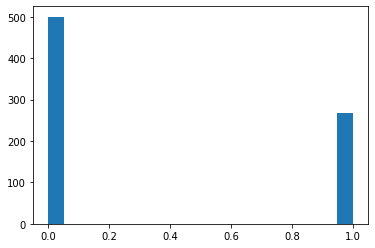

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
plt.hist(y, bins=20)
plt.show()

y_pd_series = pd.Series(y)
y_pd_series.value_counts()

## How to choose Models based on Cross-Validation?
- We want to have low variance result for CV -> pick a model that has lower variance
- If two models have low variance result for CV -> pick a model that has higher mean

## Grid Search for Parameter Selection
- Machine learning models have hyper-parameters. To know which values of hyper-paramaeters give the best result we need grid search
- Question: what does grid search mean?

In [11]:
from sklearn import svm

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_